# OCR for Chinese Writing

> run `.\.ch-venv\Scripts\activate` first \
> check `pip -V` or `pip --version` \
> deactivate `deactivate`

## 1. PaddleOCR from Baidu

In [12]:
image_path = "./data/chinese-text.jpeg"
font_path = "C:/Windows/Fonts/MSJHL.TTC"

[2025/03/03 16:46:57] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\Zidan Arsyad/.paddleocr/whl\\det\\ch\\ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\Zidan Arsyad/.paddleocr/whl\\rec\\ch\\ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', 

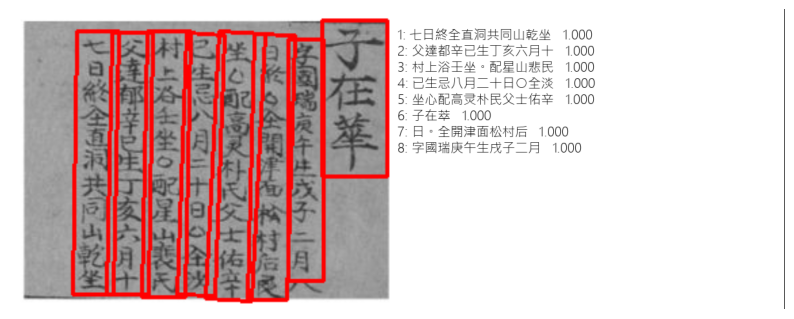

Extracted Text:
 字國瑞庚午生戌子二月
日。全開津面松村后
子在萃
坐心配高灵朴民父士佑辛
已生忌八月二十日〇全淡
村上浴壬坐。配星山悲民
父達都辛已生丁亥六月十
七日終全直洞共同山乾坐


In [14]:
# Import necessary libraries
from paddleocr import PaddleOCR, draw_ocr
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Initialize PaddleOCR with Chinese language support
ocr = PaddleOCR(lang="ch", use_angle_cls=True)

# Load the image
image_path = image_path  # Update with your local file path
image = cv2.imread(image_path)

# Perform OCR
results = ocr.ocr(image, cls=True)

# Extract detected text and bounding boxes
extracted_text = []
boxes = []
for result in results:
    for line in result:
        extracted_text.append(line[1][0])  # Recognized text
        boxes.append(line[0])  # Bounding box coordinates

# Use a valid Chinese font (change the path based on your system)
font_path = font_path  # Ubuntu/Linux example
# For Windows, try: font_path = "C:/Windows/Fonts/simhei.ttf"

# Draw bounding boxes on the image
image_with_boxes = draw_ocr(image, boxes, extracted_text, [1] * len(extracted_text), font_path=font_path)

# Convert image from OpenCV format to PIL for displaying in Jupyter
annotated_image = Image.fromarray(image_with_boxes)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(annotated_image)
plt.axis("off")  # Hide axes
plt.show()

# Show extracted text
formatted_text = "\n".join(reversed(extracted_text))  # Reverse order for correct reading
print("Extracted Text:\n", formatted_text)

❌ Still incorrect order\
❌ Some characters aren't detected

✅ TODO:
1. Find ways to improve recognition
2. Arrange the sentences properly